In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from IPython.display import display
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

from sklearn.multioutput import RegressorChain
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from funcions import dades, graficar

In [197]:
df = dades()
df = df.sort_values(by='FECHAPEDIDO')
df.set_index('FECHAPEDIDO')
categoria = 2
origen = '0-14'
df = graficar(df, categoria, origen)
df['MES_ABSOLUT'] = np.arange(len(df))
df

CAJA  MES_ABSOLUT
ANY  MES                     
2015 1    1503.0            0
     2    1341.0            1
     3    1866.0            2
     4    2273.0            3
     5    1620.0            4
...          ...          ...
2023 8    4836.0          103
     9    4350.0          104
     10   4622.0          105
     11   1414.0          106
     12   1539.0          107

[108 rows x 2 columns]

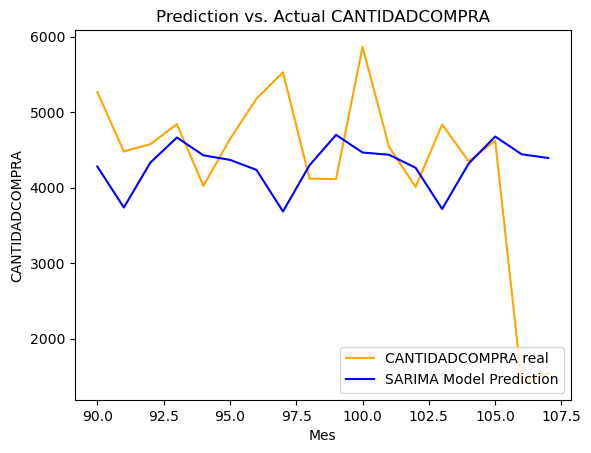

In [198]:
train_data_SARIMA = df[df['MES_ABSOLUT'] < 90]
test_data_SARIMA = df[df['MES_ABSOLUT'] >= 90]

one_step_predictions = []
for i in range(len(df)-90):
    cut_point = df.size - 90 + i
    model = sm.tsa.statespace.SARIMAX(train_data_SARIMA['CAJA'][:cut_point],
                         order=(2, 0, 0),
                         seasonal_order=(1, 1, 0, 6),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
    result = model.fit(disp=False)
    one_step_predictions.append(result.predict(cut_point).values[0])

test_data_SARIMA['prediction'] = one_step_predictions
test_data_SARIMA.set_index('MES_ABSOLUT', inplace=True)
test_data_SARIMA['CAJA'].plot(label='CANTIDADCOMPRA real', color='orange')
test_data_SARIMA['prediction'].plot(label='SARIMA Model Prediction', color='blue')
plt.title("Prediction vs. Actual CANTIDADCOMPRA")
plt.xlabel('Mes')
plt.ylabel('CANTIDADCOMPRA')

plt.legend(loc='lower right')